# Quadrature schemes

```{admonition} Objectives
:class: objectives

This code snippet shows the location of the quadrature points for different degrees, cell types and quadrature rules both in 2D and 3D.
```

```{admonition} Download sources
:class: download

* {Download}`Python script<./quadrature_schemes.py>`
* {Download}`Jupyter notebook<./quadrature_schemes.ipynb>`
```

## 2D Quadrature rule

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import basix
from basix import CellType, QuadratureType

all_cell_types = [CellType.triangle, CellType.quadrilateral]
degrees = range(5)
quad_rules = {
    QuadratureType.Default: (degrees, all_cell_types),
    QuadratureType.gauss_jacobi: (degrees, all_cell_types),
    QuadratureType.gll: (degrees, [CellType.quadrilateral]),
    QuadratureType.xiao_gimbutas: (degrees[1:], [CellType.triangle]),
}

In [41]:
def plot_quad_points_2D(rule, cell_type, deg, color, ax):
    points, weights = basix.make_quadrature(cell_type, deg, rule=rule)

    vertices = basix.geometry(cell_type)
    facets = basix.cell.sub_entity_connectivity(cell_type)[1]

    for f in facets:
        vert = vertices[f[0], :]
        ax.plot(vert[:, 0], vert[:, 1], "k")

    ax.scatter(points[:, 0], points[:, 1], 500 * weights, color=color)
    ax.set_aspect("equal")


def plot_quadrature_rule_2D(rule, color="C0"):
    degs, cell_types = quad_rules[rule]
    for deg in degs:
        plt.figure()
        for i, cell_type in enumerate(cell_types):
            no_subplot = len(cell_types) < 2
            if no_subplot:
                ax = plt.gca()
            else:
                ax = plt.subplot(1, 2, i + 1)
            ax.margins(0.05)

            plot_quad_points_2D(rule, cell_type, deg, color, ax)
        if no_subplot:
            plt.title(f"{rule.name} rule, degree $d={deg}$")
        else:
            plt.suptitle(f"{rule.name} rule, degree $d={deg}$", y=0.8)
        plt.show()

### Default quadrature rule

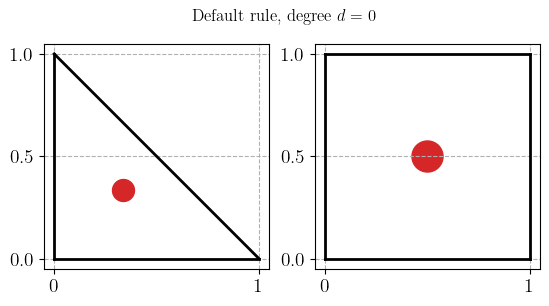

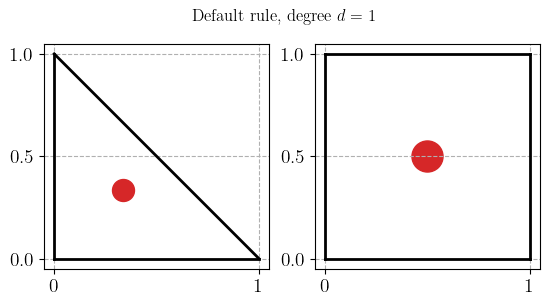

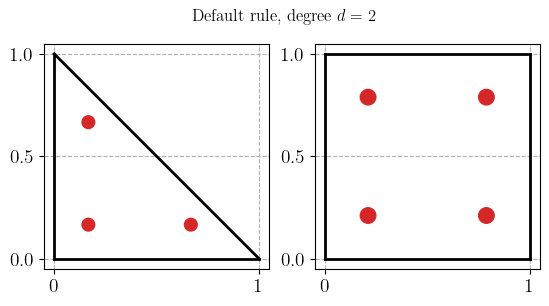

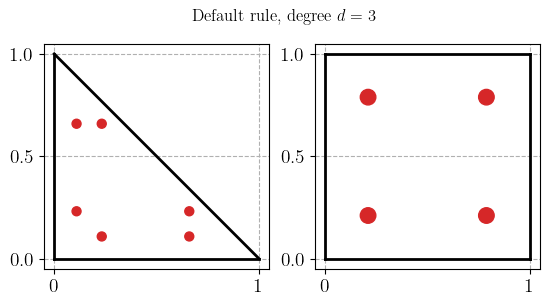

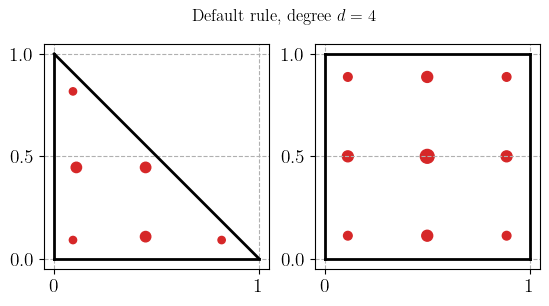

In [42]:
plot_quadrature_rule_2D(QuadratureType.Default, color="C3")

### Gauss-Jacobi quadrature rule

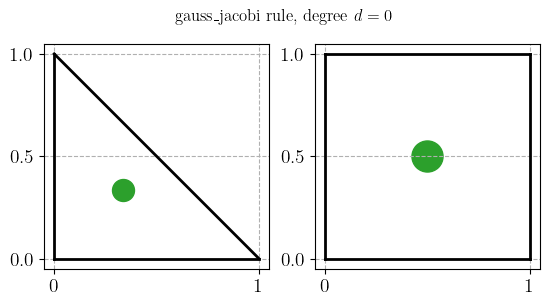

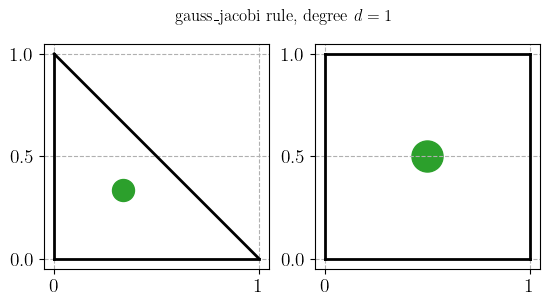

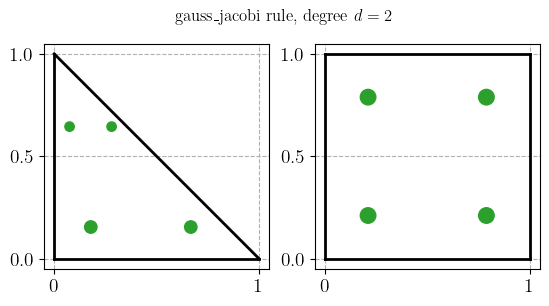

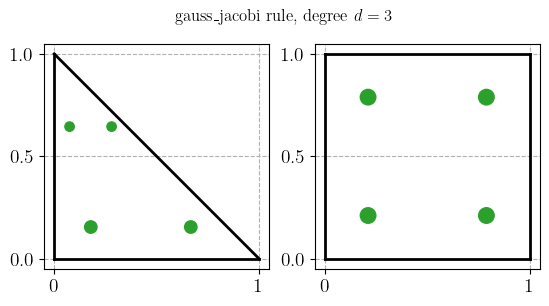

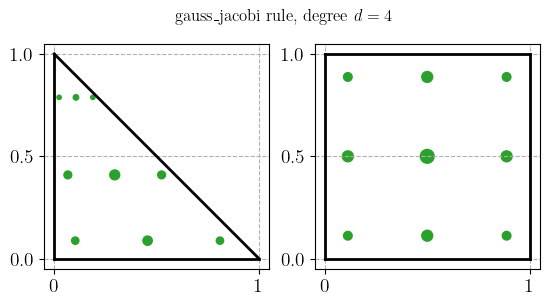

In [43]:
plot_quadrature_rule_2D(QuadratureType.gauss_jacobi, color="C2")

### Gauss-Legendre-Lobatto quadrature rule

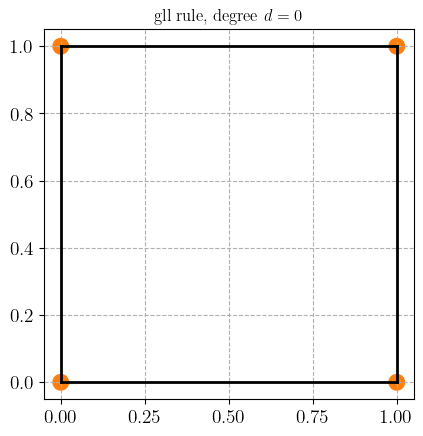

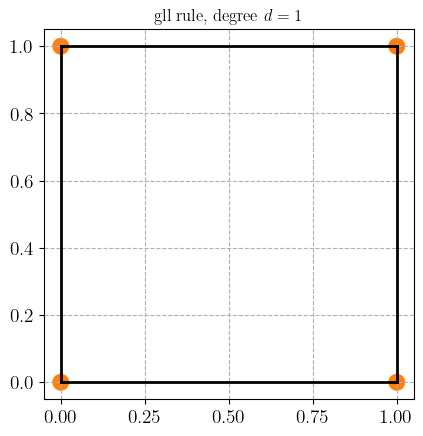

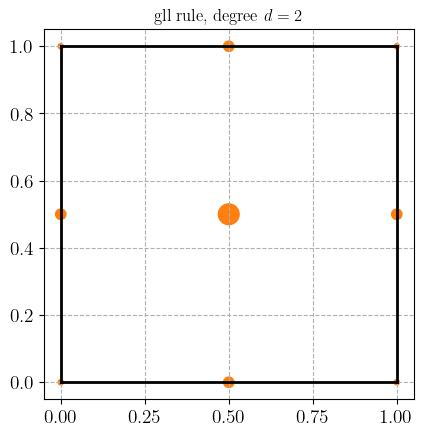

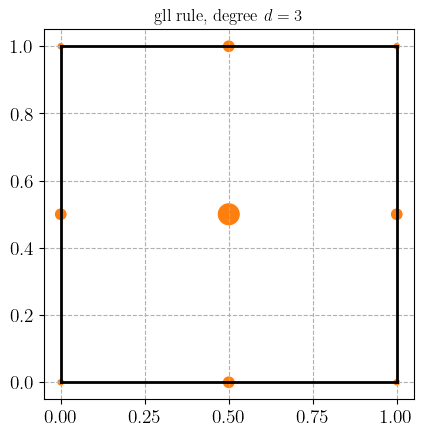

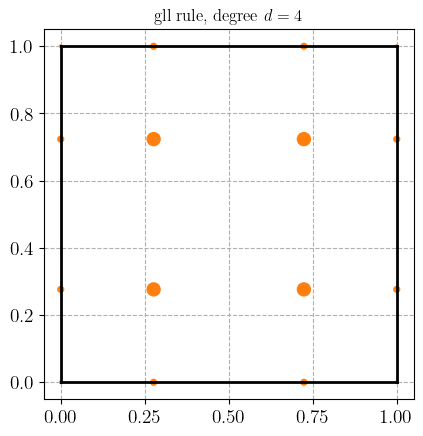

In [44]:
plot_quadrature_rule_2D(QuadratureType.gll, color="C1")

### Xiao-Gimbutas quadrature rule

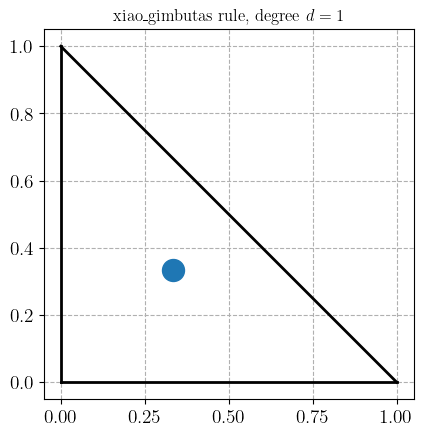

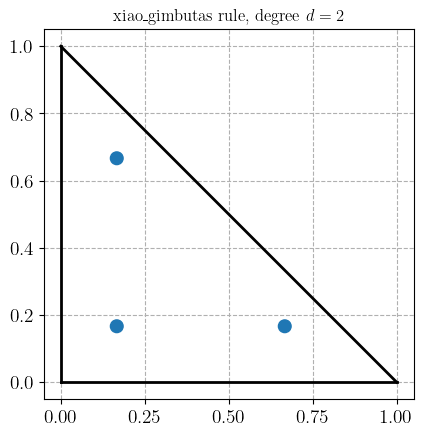

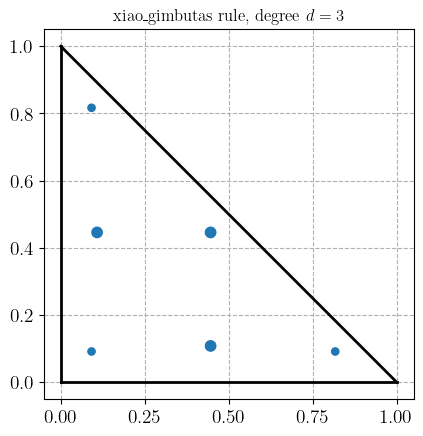

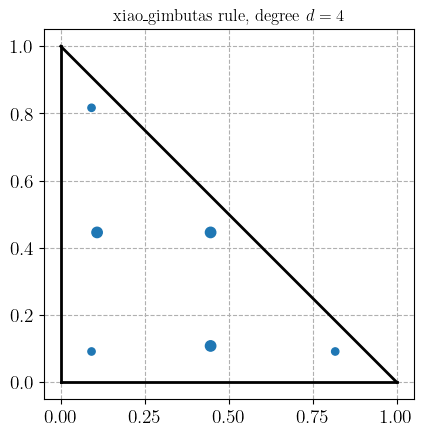

In [45]:
plot_quadrature_rule_2D(QuadratureType.xiao_gimbutas, color="C0")

## 3D rules

In [ ]:
cell_type = CellType.hexahedron
dim = 3
deg = 2

from dolfinx import cpp, mesh
import pyvista as pv
import numpy as np
from matplotlib.colors import to_hex

pv.set_jupyter_backend("static")

all_cell_types = [CellType.tetrahedron, CellType.hexahedron]
degrees = range(5)
quad_rules = {
    QuadratureType.Default: (degrees, all_cell_types),
    QuadratureType.gauss_jacobi: (degrees, all_cell_types),
    QuadratureType.gll: (degrees, [CellType.hexahedron]),
    QuadratureType.xiao_gimbutas: (degrees[1:], [CellType.tetrahedron]),
}

In [70]:
def plot_quad_points_3D(rule, cell_type, deg, color, plotter):
    points, weights = basix.make_quadrature(cell_type, deg, rule=rule)

    vertices = basix.geometry(cell_type)
    facets = basix.cell.sub_entity_connectivity(cell_type)

    num_nodes_per_cell = len(facets[dim - 1][0][0])

    subentity_cell_type = {
        CellType.tetrahedron: mesh.CellType.triangle,
        CellType.hexahedron: mesh.CellType.quadrilateral,
    }
    map_vtk = np.argsort(
        cpp.io.perm_vtk(subentity_cell_type[cell_type], num_nodes_per_cell)
    )

    faces = [[f[0][m] for m in map_vtk] for f in facets[dim - 1]]

    cell = pv.PolyData.from_regular_faces(vertices, faces)

    # Add the mesh to the plotter
    plotter.add_mesh(cell, color="gray", opacity=0.4, show_edges=True)

    point_cloud = pv.PolyData(points)
    point_cloud["weights"] = np.abs(weights) ** 0.33 * 0.25
    glyphs = point_cloud.glyph(scale="weights", geom=pv.Sphere(), orient=False)
    plotter.add_mesh(glyphs, color=to_hex(color))
    plotter.camera.azimuth = 10.0
    plotter.camera.elevation = -30.0


def plot_quadrature_rule_3D(rule, color="C0"):
    degs, cell_types = quad_rules[rule]
    for deg in degs:
        for i, cell_type in enumerate(cell_types):
            no_subplot = len(cell_types) < 2
            # Create a PyVista plotter
            if no_subplot:
                plotter = pv.Plotter()
                plotter.window_size = (400, 400)
                plotter.add_title(rf"{rule.name} rule, degree d={deg}", font_size=10)
            else:
                if i == 0:
                    plotter = pv.Plotter(shape=(1, 2))
                    plotter.window_size = (800, 400)
                plotter.subplot(0, i)
                plotter.add_title(rf"{rule.name} rule, degree d={deg}", font_size=10)

            plot_quad_points_3D(rule, cell_type, deg, color, plotter)

        plotter.show()

### Default quadrature rule

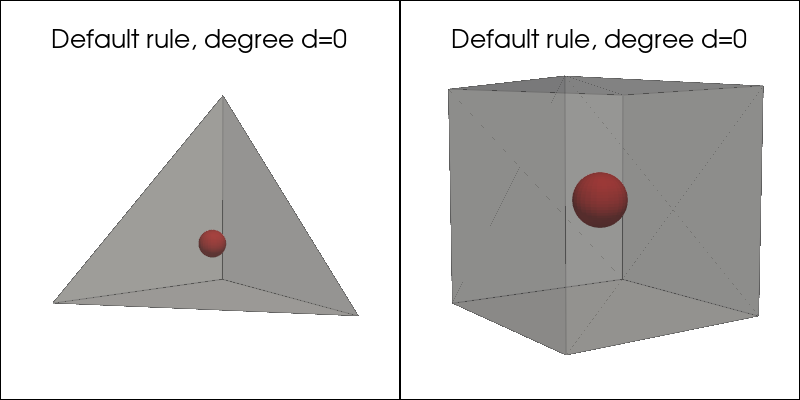

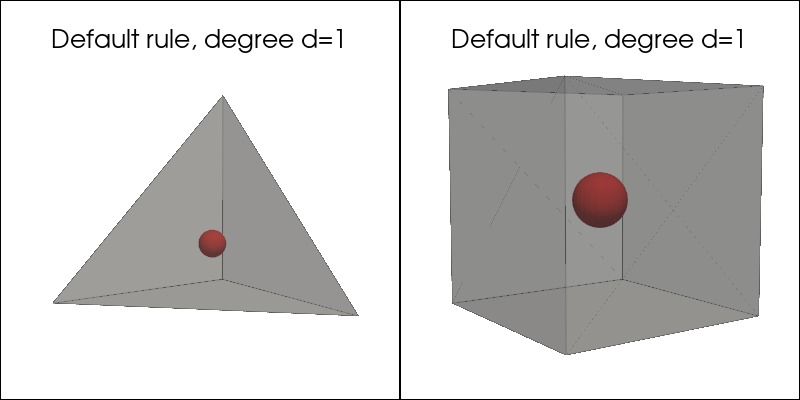

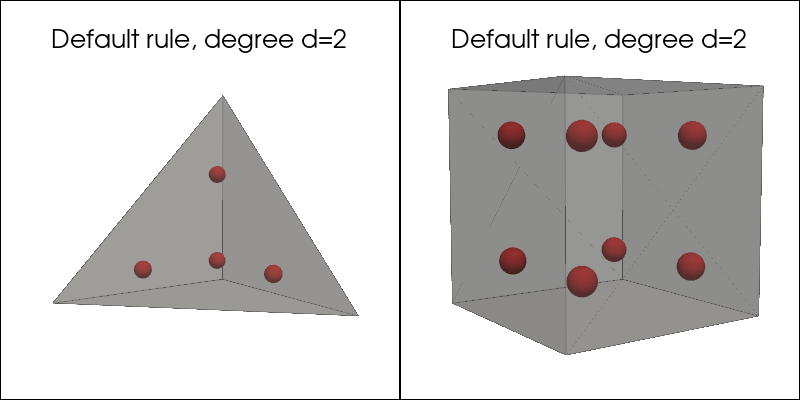

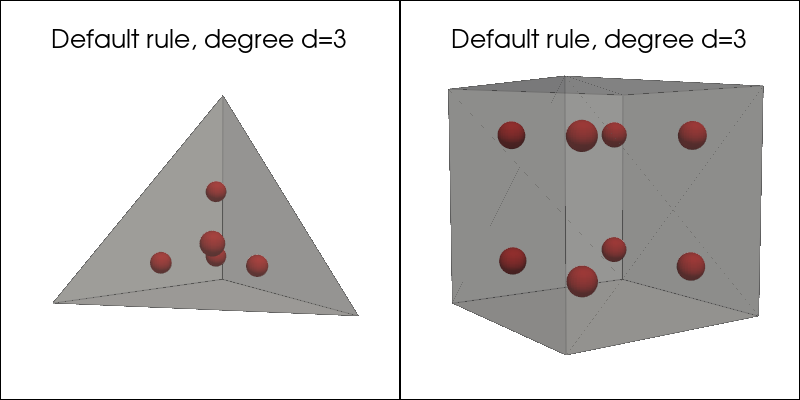

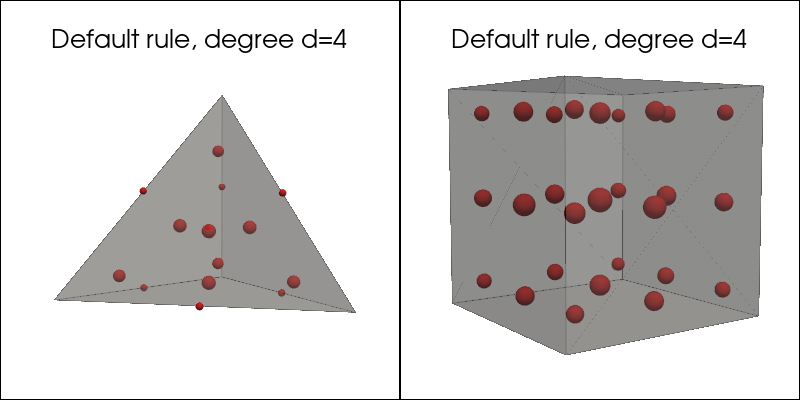

In [71]:
plot_quadrature_rule_3D(QuadratureType.Default, "C3")

### Gauss-Jacobi quadrature rule

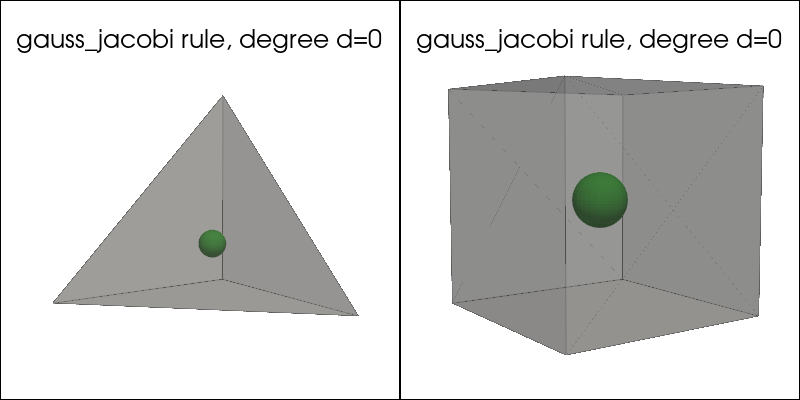

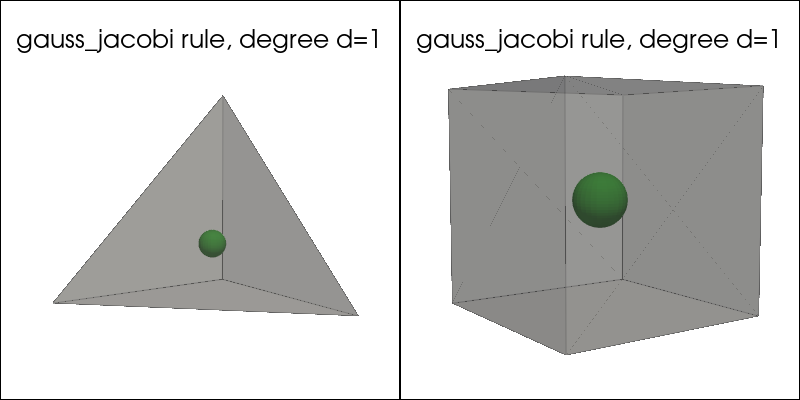

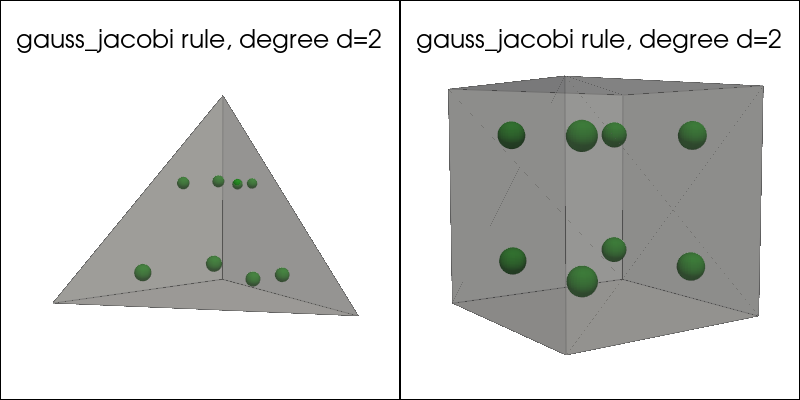

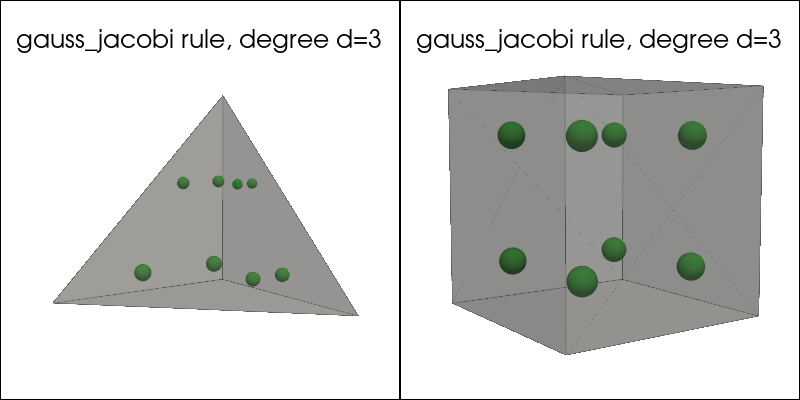

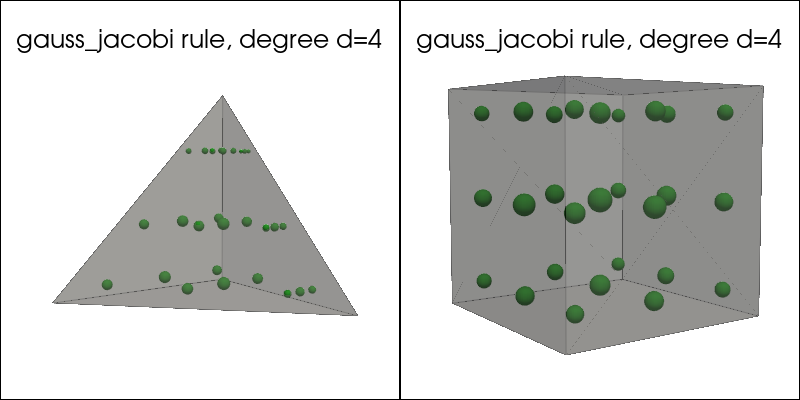

In [72]:
plot_quadrature_rule_3D(QuadratureType.gauss_jacobi, "C2")

### Gauss-Legendre-Lobatto quadrature rule

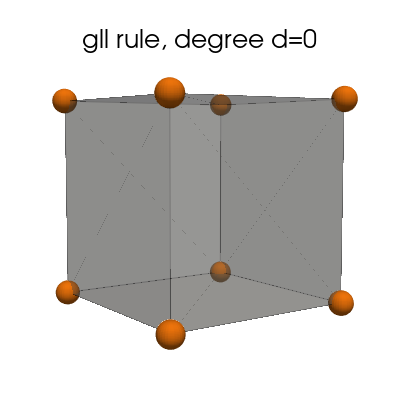

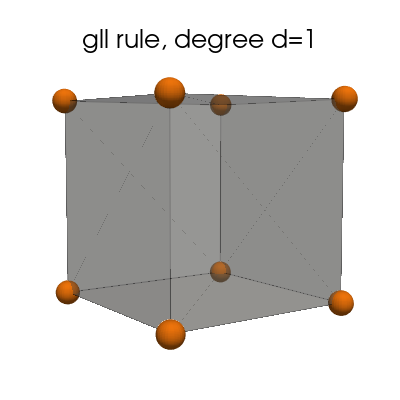

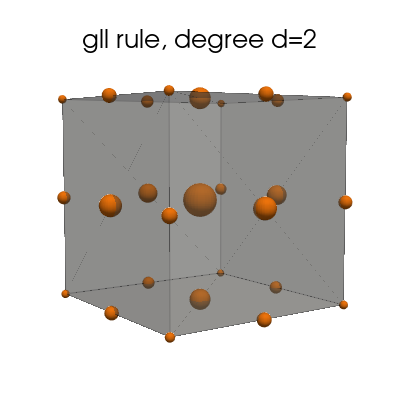

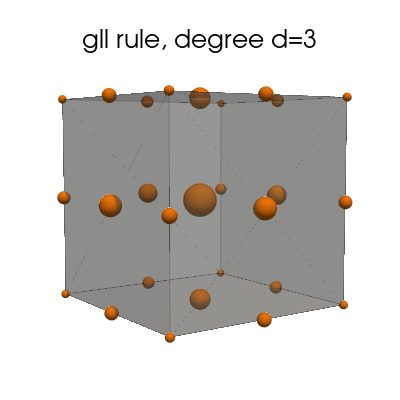

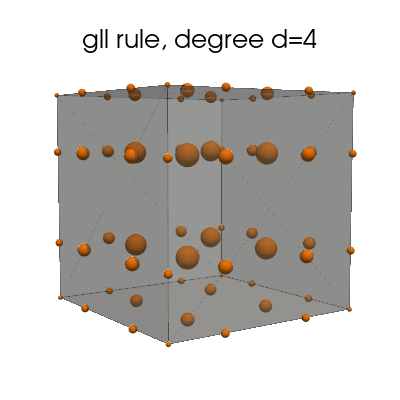

In [73]:
plot_quadrature_rule_3D(QuadratureType.gll, "C1")

### Xiao-Gimbutas quadrature rule

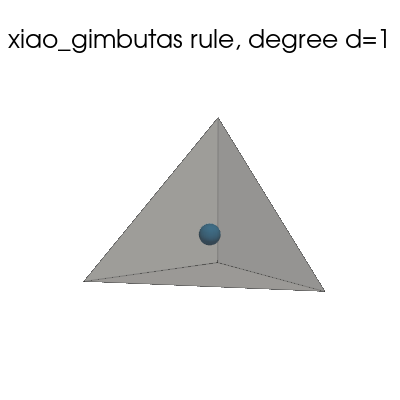

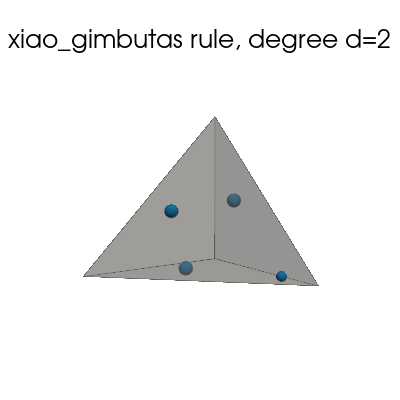

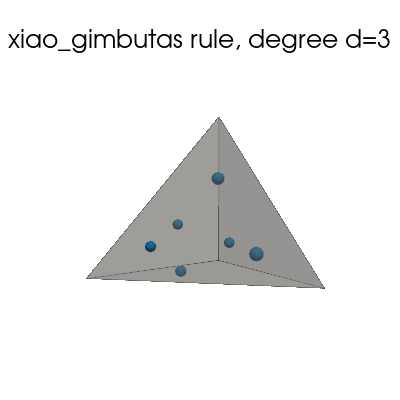

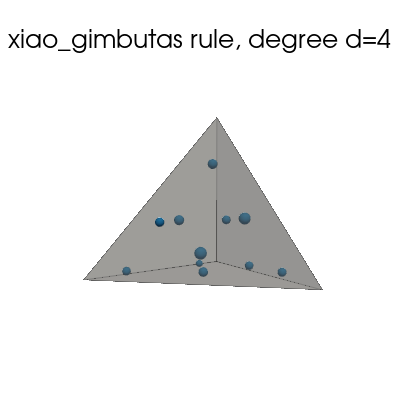

In [63]:
plot_quadrature_rule_3D(QuadratureType.xiao_gimbutas, "C0")